In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
%matplotlib inline


In [239]:
df= pd.read_csv('titanic.csv', engine = "python", encoding = "euc-kr")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


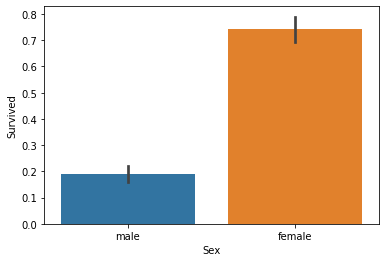

In [292]:
sns.barplot(x='Sex', y='Survived', data=df)

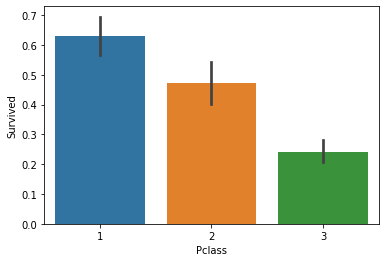

In [288]:
sns.barplot(x='Pclass', y='Survived', data=df)

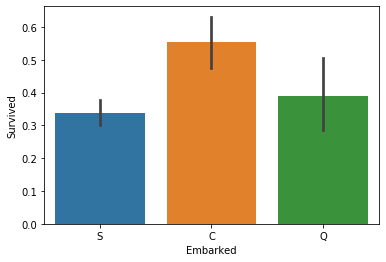

In [314]:
sns.barplot(x='Embarked', y='Survived', data=df)

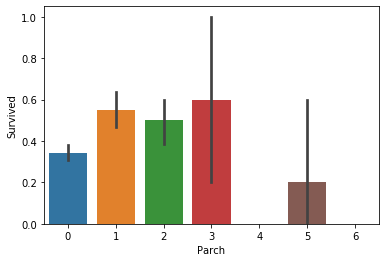

In [315]:
sns.barplot(x='Parch', y='Survived', data=df)

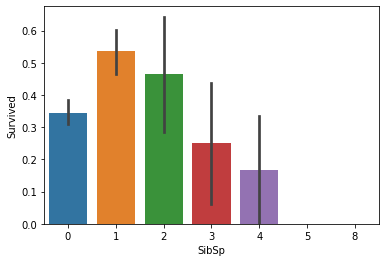

In [316]:
sns.barplot(x='SibSp', y='Survived', data=df)

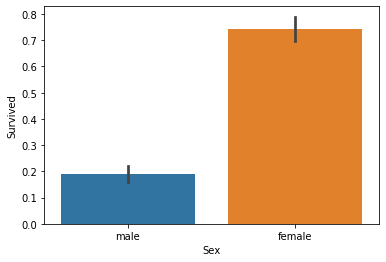

In [313]:
sns.barplot(x='Sex', y='Survived', data=df)

In [294]:
# sns.barplot(x='Age', y='Survived', data=df)

In [241]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


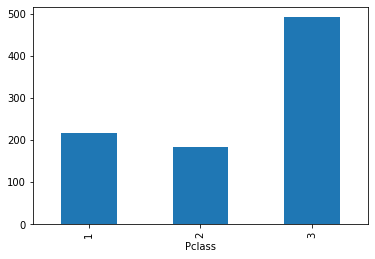

In [256]:
df_groupby = df.groupby(["Pclass"],as_index = False).size()

# ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"
df_groupby.plot.bar()

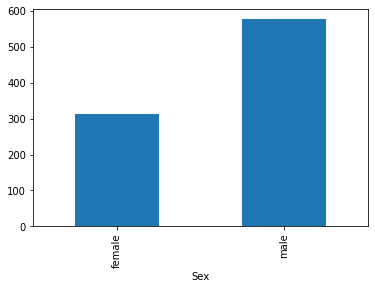

In [257]:
df_groupby = df.groupby(["Sex"],as_index = False).size()

# ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"
df_groupby.plot.bar()

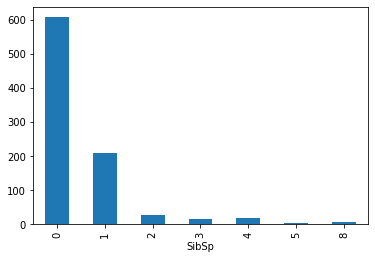

In [258]:
df_groupby = df.groupby(["SibSp"],as_index = False).size()

# ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"
df_groupby.plot.bar()

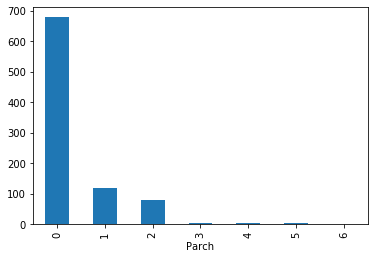

In [262]:
df_groupby = df.groupby(["Parch"],as_index = False).size()

# ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"
df_groupby.plot.bar()

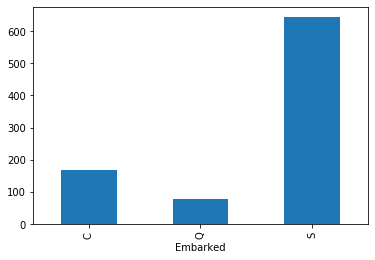

In [269]:
df_groupby = df.groupby(["Embarked"],as_index = False).size()

# ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"
df_groupby.plot.bar()

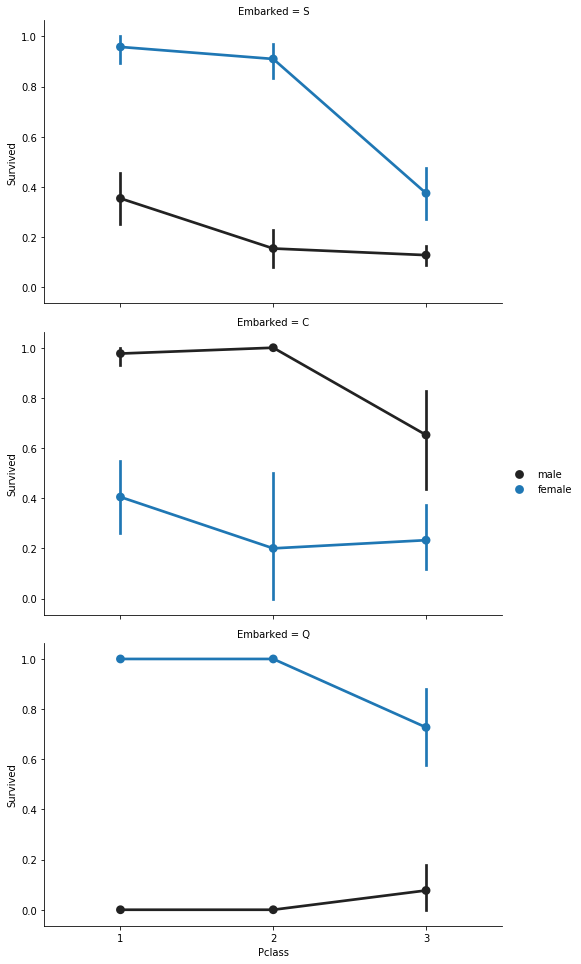

In [291]:
FacetGrid = sns.FacetGrid(df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [ ]:
FacetGrid = sns.FacetGrid(df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

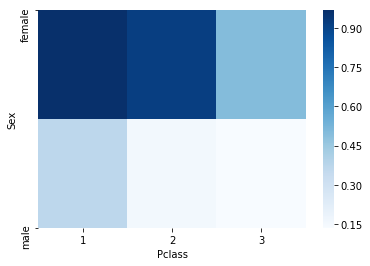

In [289]:
df_agg = df.groupby(["Sex","Pclass"],as_index = False).agg("mean")
df_pivot = df_agg.pivot("Sex","Pclass",'Survived')
sns.heatmap(df_pivot, cmap = "Blues")

In [4]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()

ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

NameError: name 'plt' is not defined